(np.float64(-0.5), np.float64(1199.5), np.float64(749.5), np.float64(-0.5))

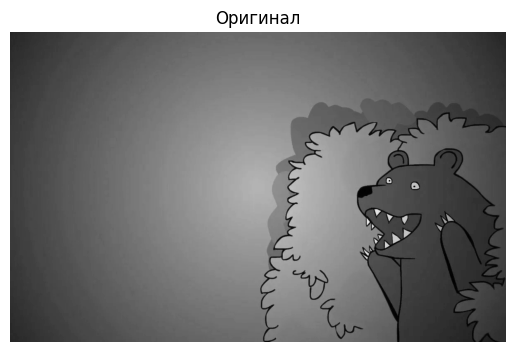

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise
from mpl_toolkits.mplot3d import Axes3D

# Загрузка изображения
img = cv.imread("img.png")
img_bw = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Нормализация изображения
img_bw_normalized = img_bw / 255.0
plt.imshow(img_bw_normalized, cmap='gray')
plt.title('Оригинал')
plt.axis('off')

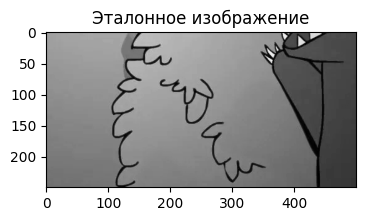

In [13]:
# Определение координат и размеров шаблона
# Обновленные координаты и размеры шаблона
x, y, w, h = 500, 500, 500, 500
template = img_bw_normalized[y:y+h, x:x+w]

plt.figure(figsize=(6,6))
plt.title("Эталонное изображение")
plt.imshow(template, cmap='gray')
plt.show()


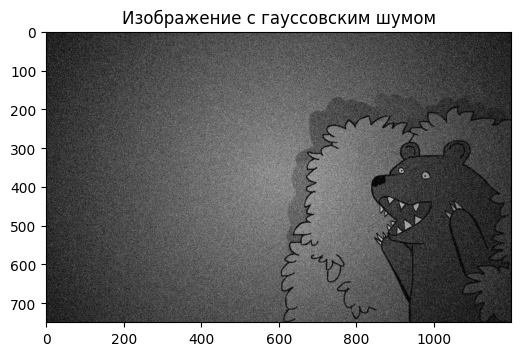

In [15]:
# Добавление гауссовского шума
noise_img = random_noise(img_bw_normalized, mode='gaussian', clip=True, mean=0, var=0.01)

# Преобразование изображения с плавающей запятой в формат uint8
noise_img_uint8 = np.array(255 * noise_img, dtype='uint8')

plt.figure(figsize=(6,6))
plt.title("Изображение с гауссовским шумом")
plt.imshow(noise_img_uint8, cmap='gray')
plt.show()


In [18]:
def mutual_correlation(RI, CI):
    N, M = RI.shape
    CI_height, CI_width = CI.shape
    correlation = np.zeros((CI_height - N + 1, CI_width - M + 1))
    
    # Вычисление математических ожиданий и стандартных отклонений
    M_RI = np.mean(RI)
    M_CI = cv.boxFilter(CI, ddepth=-1, ksize=(M, N))[N-1:CI_height, M-1:CI_width] / (N*M)
    
    # Центрирование изображений
    RI_centered = RI - M_RI
    CI_centered = CI - M_CI
    
    # Вычисление корреляционной функции
    for i in range(correlation.shape[0]):
        for j in range(correlation.shape[1]):
            CI_patch = CI_centered[i:i+N, j:j+M]
            correlation[i, j] = np.sum(RI_centered * CI_patch) / (N*M)
    
    # Нормирование корреляционной функции
    sigma_RI = np.std(RI)
    sigma_CI = cv.boxFilter((CI - M_CI)**2, ddepth=-1, ksize=(M, N))[N-1:CI_height, M-1:CI_width]
    sigma_CI = np.sqrt(sigma_CI / (N*M))
    correlation_normalized = correlation / (sigma_RI * sigma_CI + 1e-5)  # Добавлен небольшой epsilon для предотвращения деления на ноль
    
    return correlation_normalized

# Вычисление взаимной корреляционной функции
correlation = mutual_correlation(template, noise_img_normalized)

plt.figure(figsize=(6,6))
plt.title("Взаимная корреляционная функция")
plt.imshow(correlation, cmap='jet')
plt.colorbar()
plt.show()


NameError: name 'noise_img_normalized' is not defined